In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [2]:
# CNN模型定义
class SimpleCNN(nn.Module):
    def __init__(self, num_classes=2):
        super(SimpleCNN, self).__init__()
        # 卷积层
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1)

        # 最大池化
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        
        # 全连接层
        self.fc1 = nn.Linear(128 * 28 * 28, 512)  # 扁平化后的特征数
        self.fc2 = nn.Linear(512, num_classes)
        
        # 激活函数
        self.relu = nn.ReLU()

    def forward(self, x):
        # 通过卷积层
        x = self.relu(self.conv1(x))
        x = self.pool(x)
        x = self.relu(self.conv2(x))
        x = self.pool(x)
        x = self.relu(self.conv3(x))
        x = self.pool(x)
        
        # 扁平化
        x = x.view(x.size(0), -1)
        
        # 通过全连接层
        x = self.relu(self.fc1(x))
        x = self.fc2(x)  # 分类结果
        
        return x

In [3]:
# 定义模型训练函数
def train_model(model, train_loader, criterion, optimizer, device):
    model.train()  # 设置模型为训练模式
    running_loss = 0.0
    correct = 0
    total = 0
    
    for i, (inputs, labels) in enumerate(train_loader):
        inputs, labels = inputs.to(device), labels.to(device)
        
        optimizer.zero_grad()  # 清除之前的梯度
        outputs = model(inputs)  # 进行前向传播
        
        loss = criterion(outputs, labels)  # 计算损失
        loss.backward()  # 反向传播
        optimizer.step()  # 更新权重
        
        running_loss += loss.item()
        
        # 计算准确率
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    epoch_loss = running_loss / len(train_loader)
    epoch_acc = correct / total * 100
    return epoch_loss, epoch_acc

# 定义模型测试函数
def test_model(model, test_loader, device):
    model.eval()  # 设置模型为评估模式
    correct = 0
    total = 0
    
    with torch.no_grad():  # 在测试时不需要计算梯度
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = correct / total * 100
    return accuracy

In [4]:
# 定义主函数
def main(train_loader, val_loader, test_loader, device, num_epochs=10):
    # 定义模型、损失函数和优化器
    model = SimpleCNN().to(device)
    criterion = nn.CrossEntropyLoss()  # 使用交叉熵损失函数
    optimizer = optim.Adam(model.parameters(), lr=0.001)  # 使用Adam优化器
    
    train_accuracies = []
    val_accuracies = []
    train_losses = []

    for epoch in range(num_epochs):
        print(f"Epoch {epoch + 1}/{num_epochs}")

        # 训练模型
        train_loss, train_acc = train_model(model, train_loader, criterion, optimizer, device)
        train_losses.append(train_loss)
        train_accuracies.append(train_acc)

        # 在验证集上测试模型
        val_acc = test_model(model, val_loader, device)
        val_accuracies.append(val_acc)

        print(f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_acc:.2f}%")
        print(f"Validation Accuracy: {val_acc:.2f}%\n")
    
    # 测试模型
    test_acc = test_model(model, test_loader, device)
    print(f"Test Accuracy: {test_acc:.2f}%")
    
    # 绘制训练过程中训练准确率的变化
    plt.figure(figsize=(10, 5))
    plt.plot(range(1, num_epochs + 1), train_accuracies, label="Training Accuracy")
    plt.plot(range(1, num_epochs + 1), val_accuracies, label="Validation Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy (%)")
    plt.title("Training and Validation Accuracy")
    plt.legend()
    plt.show()

    # 绘制训练损失的变化
    plt.figure(figsize=(10, 5))
    plt.plot(range(1, num_epochs + 1), train_losses, label="Training Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Training Loss")
    plt.legend()
    plt.show()

Epoch 1/10
Train Loss: 1.5880, Train Accuracy: 53.49%
Validation Accuracy: 54.78%

Epoch 2/10
Train Loss: 0.6914, Train Accuracy: 54.70%
Validation Accuracy: 54.78%

Epoch 3/10
Train Loss: 0.6909, Train Accuracy: 54.70%
Validation Accuracy: 54.78%

Epoch 4/10
Train Loss: 0.6899, Train Accuracy: 54.70%
Validation Accuracy: 54.78%

Epoch 5/10
Train Loss: 0.6899, Train Accuracy: 54.70%
Validation Accuracy: 54.78%

Epoch 6/10
Train Loss: 0.6887, Train Accuracy: 54.70%
Validation Accuracy: 54.78%

Epoch 7/10
Train Loss: 0.6891, Train Accuracy: 54.70%
Validation Accuracy: 54.78%

Epoch 8/10
Train Loss: 0.6889, Train Accuracy: 54.70%
Validation Accuracy: 54.78%

Epoch 9/10
Train Loss: 0.6889, Train Accuracy: 54.70%
Validation Accuracy: 54.78%

Epoch 10/10
Train Loss: 0.6891, Train Accuracy: 54.70%
Validation Accuracy: 54.78%

Test Accuracy: 54.74%


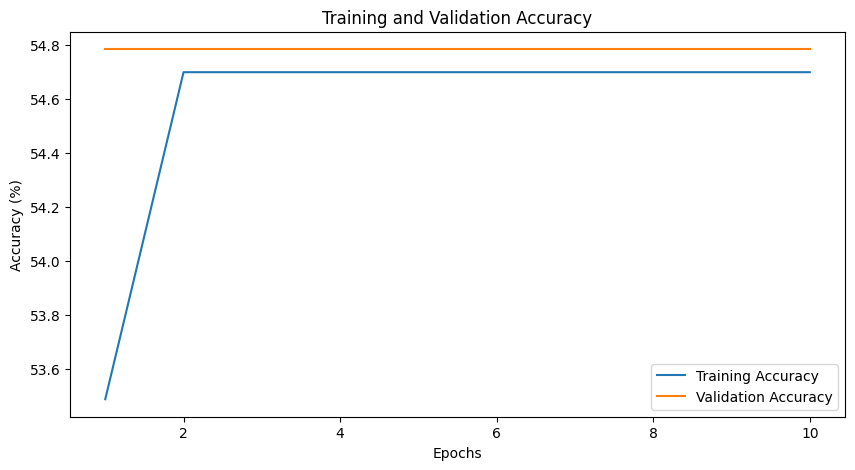

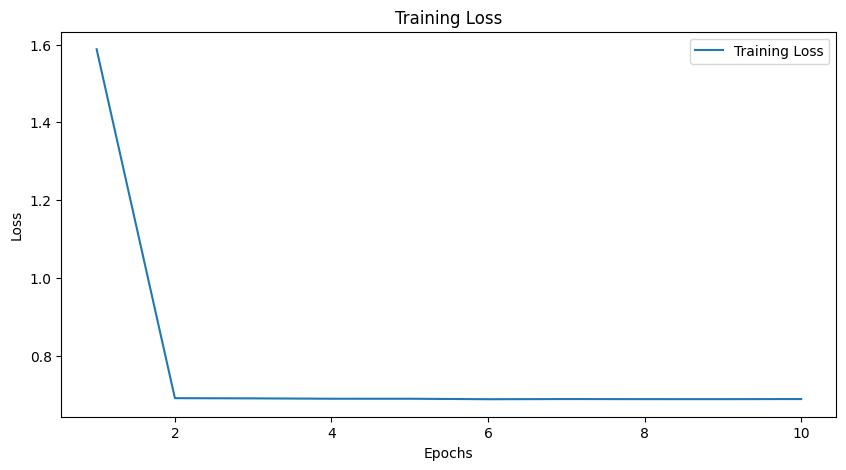

In [6]:
# 设置gpu训练
device = torch.device("cuda")

# 加载处理好的频谱图数据集
train_loader = torch.load('../data/Dataloader_2D/train_loader.pth')
val_loader = torch.load('../data/Dataloader_2D/val_loader.pth')
test_loader = torch.load('../data/Dataloader_2D/test_loader.pth')

# 运行训练和测试
main(train_loader, val_loader, test_loader, device, num_epochs=10)
